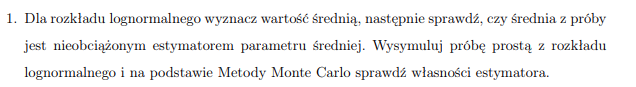

In [2]:
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
mi = 0
sigma = 1
ns = np.linspace(1000,10000,10)

In [9]:
def lognormal_mean(mi, sigma):
    return np.exp(mi + sigma**2/2)

In [10]:
samples_norm = []
for n in ns:
    sams = []
    for i in range(1000):
        sam = np.random.normal(mi, sigma, int(n))
        sams.append(sam)
    samples_norm.append(sams)

In [11]:
samples_lognorm = []
for sample in samples_norm:
    sams = []
    for sample1 in sample:
        sams.append(np.exp(sample1))
    samples_lognorm.append(sams)


In [12]:
means = []
for sample1 in samples_lognorm:
    means1 = []
    for sample in sample1:
        means1.append(np.mean(sample))
    means.append(means1)
    



In [13]:
xs = np.linspace(1,10,1000)
means_teo = [lognormal_mean(mi, sigma)] * 1000

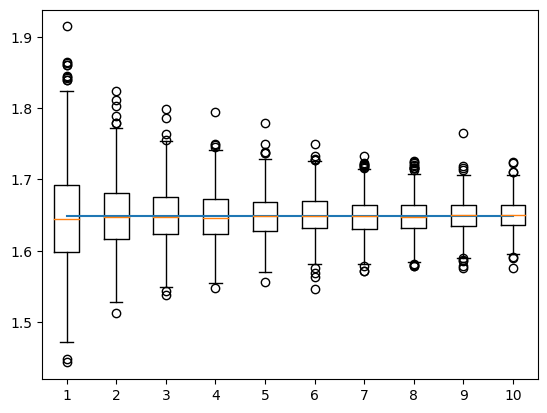

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(means)
plt.plot(xs, means_teo)
plt.show()

In [15]:
vars = []
for mean in means:
    vars.append(np.var(mean))

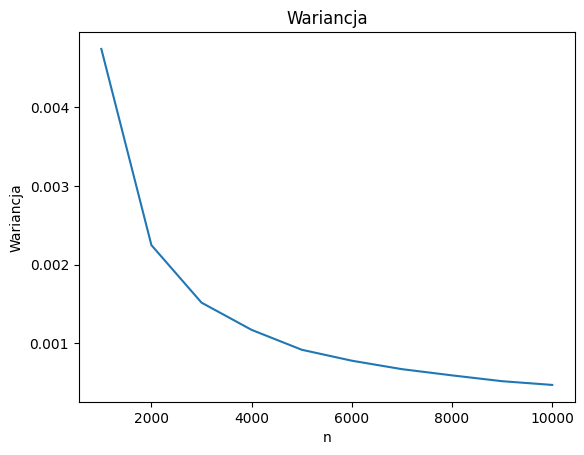

In [16]:
plt.plot(ns,vars)
plt.title("Wariancja")
plt.xlabel("n")
plt.ylabel("Wariancja")
plt.show()

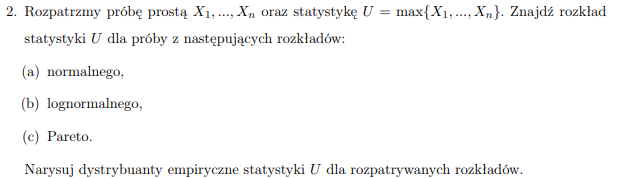

Na bazie rozkładu normalnego

In [17]:
mi2 = 0
sigma2 = 1
n2 = 1000

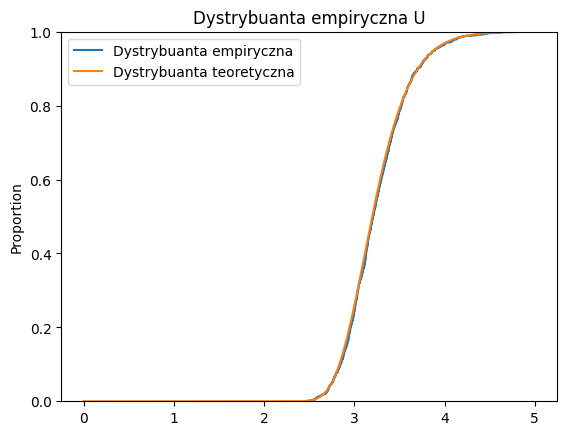

In [21]:
from scipy.stats import norm,lognorm
import matplotlib.pyplot as plt

def u_norm_cdf(x):
    return (norm.cdf(x, mi2, sigma2))**1000

def u_norm_pdf(x):
    return 1000*norm.cdf(x,mi2,sigma2)**999 * norm.pdf(x,mi2, sigma2)

def u_normal(mi, sigma, n):
    samples = [np.random.normal(mi,sigma,1000) for i in range(n)]
    return [max(sample) for sample in samples]

xs = np.linspace(0,5,1000)
u_norm_sample = u_normal(mi2, sigma2, n2)
sns.ecdfplot(data=u_norm_sample, label="Dystrybuanta empiryczna")
plt.plot(xs, u_norm_cdf(xs), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

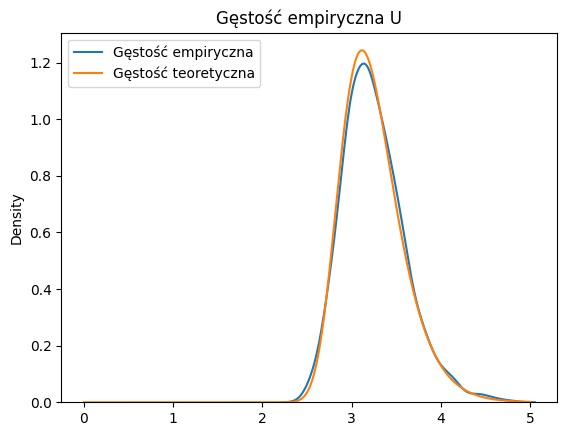

In [35]:

sns.kdeplot(data=u_norm_sample, label="Gęstość empiryczna")
plt.plot(xs, u_norm_pdf(xs), label="Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Gęstość empiryczna U")
plt.show()

Na bazie rozkładu lognormalnego

In [23]:

mi3 = 0
sigma3 = 1
n3 = 1000

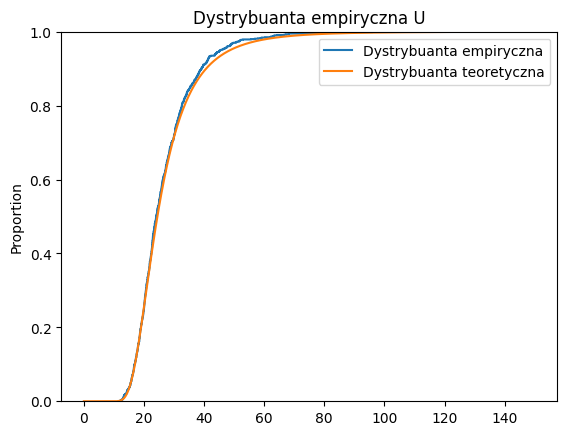

In [37]:
def u_lognormal(mi, sigma, n):
    samples = [np.random.lognormal(mi,sigma,1000) for i in range(n)]
    return [max(sample) for sample in samples]

def u_lognorm_pdf(x):
    return 1000*lognorm.cdf(x,1,mi2,sigma2)**999 * lognorm.pdf(x,1,mi2, sigma2)

def u_lognorm_cdf(x):
    return (lognorm.cdf(x,1, mi2, sigma2))**1000

xs2 = np.linspace(0,150,1000)
u_lognorm_sample = u_lognormal(mi3, sigma3, n3)
sns.ecdfplot(data=u_lognorm_sample, label="Dystrybuanta empiryczna")
plt.plot(xs2, u_lognorm_cdf(xs2), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

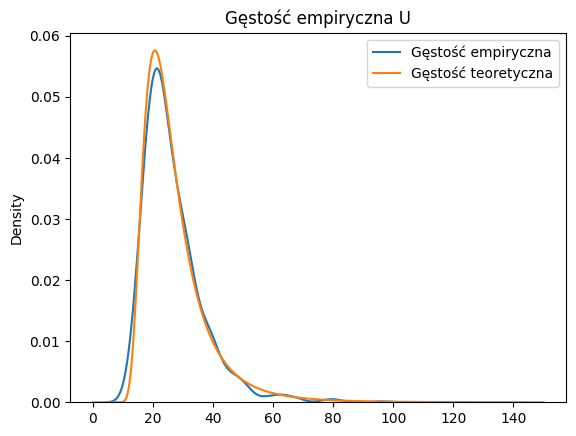

In [38]:
sns.kdeplot(data=u_lognorm_sample, label="Gęstość empiryczna")
plt.plot(xs2, u_lognorm_pdf(xs2), label="Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Gęstość empiryczna U")
plt.show()

Na bazie rozkładu Pareto

In [80]:
alpha = 2
lambda_ = 1
n4 = 1000
xs3 = np.linspace(0, 800, 1000)

In [81]:
def pareto_cdf(x, alpha, lambda_):
    return 1 - (lambda_/(lambda_ + x))**alpha

In [82]:
def pareto_pdf(x, alpha, lambda_):
    return alpha * lambda_**alpha/(x + lambda_)**(alpha + 1)

In [83]:
import random
def pareto_simulation(sample, alpha = 2, lambd = 1):
    us = []
    for i in range(sample):
        us.append(random.random())
    return [lambd * ((1-u)**(-1/alpha) - 1) for u in us]

In [84]:
def u_pareto(n, alpha, lambda_):
    samples = [pareto_simulation(1000, alpha, lambda_) for i in range(n)]
    return [max(sample) for sample in samples]
    
def u_pareto_pdf(x, alpha, lambda_):
    return 1000*pareto_cdf(x, alpha, lambda_)**999 * pareto_pdf(x, alpha, lambda_)

def u_pareto_cdf(x, alpha, lambda_):
    return (pareto_cdf(x,alpha, lambda_))**1000

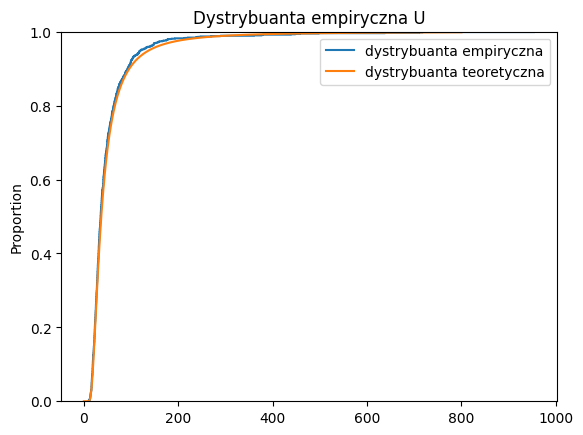

In [85]:
u_pareto_sample = u_pareto(n4, alpha,lambda_)
sns.ecdfplot(data=u_pareto_sample, label="dystrybuanta empiryczna")
plt.plot(xs3, u_pareto_cdf(xs3, alpha, lambda_), label="dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

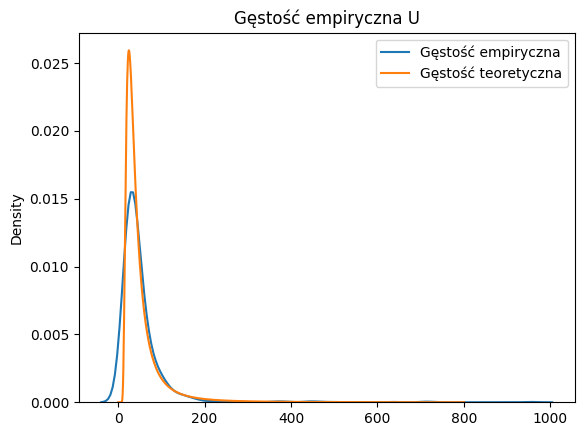

In [86]:

sns.kdeplot(data=u_pareto_sample, label="Gęstość empiryczna")
plt.plot(xs3, u_pareto_pdf(xs3, alpha, lambda_), label="Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Gęstość empiryczna U")
plt.show()

Zadanie 3

In [92]:
def lognormal_var(mi, sigma):
    return np.exp(2 * mi + sigma**2) * (np.exp(sigma**2 - 1))

In [88]:
def variance_estim1(samples):
    sum1 = 0
    mean_ = np.mean(samples)
    for sample in samples:
        sum1 += (sample - mean_)**2
    return sum1/len(samples)

In [87]:
def variance_estim2(samples):
    sum1 = 0
    mean_ = np.mean(samples)
    for sample in samples:
        sum1 += (sample - mean_)**2
    return sum1/(len(samples) - 1)

In [89]:
samples_norm2 = []
for n in ns:
    sams = []
    for i in range(1000):
        sam = np.random.normal(mi, sigma, int(n))
        sams.append(sam)
    samples_norm2.append(sams)

In [90]:
samples_lognorm2 = []
for sample in samples_norm2:
    sams = []
    for sample1 in sample:
        sams.append(np.exp(sample1))
    samples_lognorm2.append(sams)


In [95]:
vars_ = []
for sample1 in samples_lognorm2:
    vars1 = []
    for sample in sample1:
        vars1.append(variance_estim1(sample))
    vars_.append(vars1)

In [100]:
vars_2 = []
for sample1 in samples_lognorm2:
    vars1 = []
    for sample in sample1:
        vars1.append(variance_estim2(sample))
    vars_2.append(vars1)

In [96]:
xs4 = np.linspace(1,10,1000)
vars_teo = [lognormal_var(mi, sigma)] * 1000

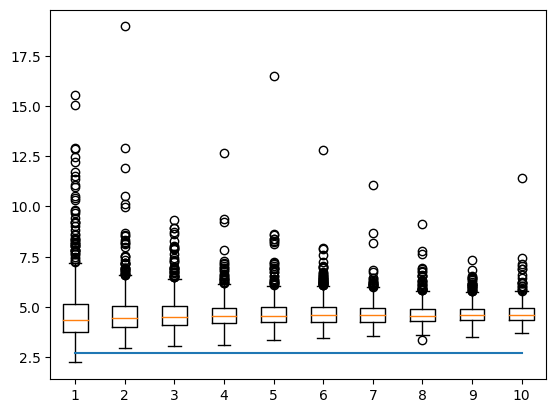

In [99]:
import matplotlib.pyplot as plt
plt.boxplot(vars_)
plt.plot(xs4, vars_teo)
plt.title("Boxploty dla estymatora 1")
plt.show()

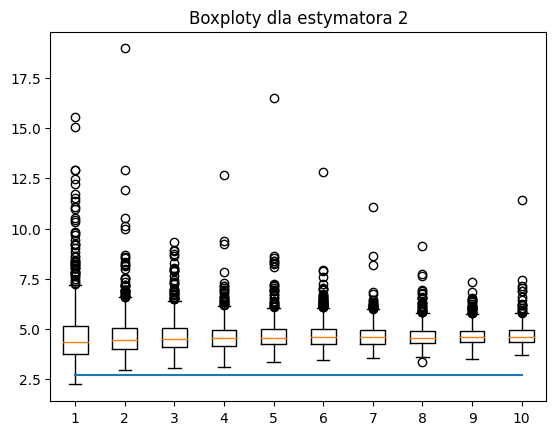

In [101]:
import matplotlib.pyplot as plt
plt.boxplot(vars_2)
plt.plot(xs4, vars_teo)
plt.title("Boxploty dla estymatora 2")
plt.show()

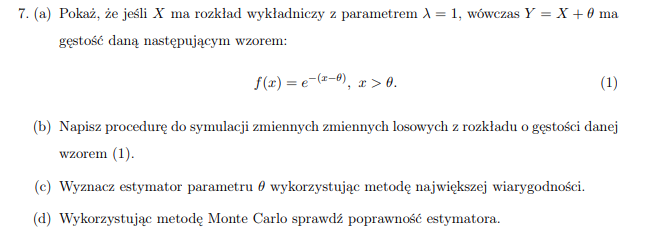

In [23]:
theta = 5
from scipy.stats import expon

In [14]:
def y_cdf(x, theta):
    return np.exp(-(x-theta))

In [3]:
def y_simul(n, theta):
    U = np.random.uniform(0,1,n)
    return np.log(1/(1-U)) + theta


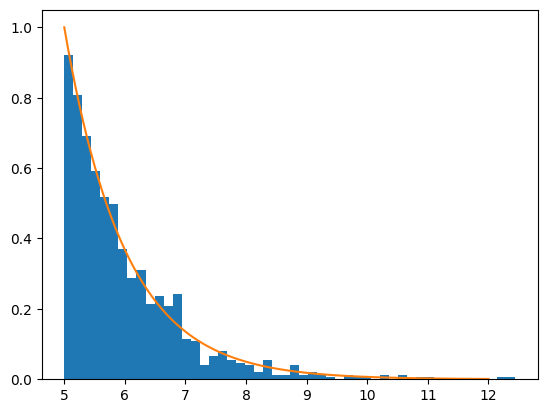

In [24]:
xs = np.linspace(theta,7+theta,1000)
sample_y = y_simul(1000, theta)
plt.hist(sample_y, density=True, bins=50)
plt.plot(xs, y_cdf(xs, theta))
plt.show()